In [232]:
import pandas as pd
########
#from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, RidgeCV, LassoCV, ElasticNetCV
from sklearn.datasets import make_blobs

from sklearn import datasets, svm, metrics
#from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_predict

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingRandomSearchCV, HalvingGridSearchCV

import warnings 
warnings.filterwarnings('ignore')


In [233]:
df = pd.read_csv('Covid_data.csv', sep=',')
df

iso_code     location        date  total_cases  total_deaths  \
0          AFG  Afghanistan  2019-12-31          0.0           0.0   
1          AFG  Afghanistan  2020-01-01          0.0           0.0   
2          AFG  Afghanistan  2020-01-02          0.0           0.0   
3          AFG  Afghanistan  2020-01-03          0.0           0.0   
4          AFG  Afghanistan  2020-01-04          0.0           0.0   
...        ...          ...         ...          ...           ...   
50413      ZWE     Zimbabwe  2020-10-15       8055.0         231.0   
50414      ZWE     Zimbabwe  2020-10-16       8075.0         231.0   
50415      ZWE     Zimbabwe  2020-10-17       8099.0         231.0   
50416      ZWE     Zimbabwe  2020-10-18       8110.0         231.0   
50417      ZWE     Zimbabwe  2020-10-19       8147.0         231.0   

       stringency_index  population  gdp_per_capita  human_development_index  \
0                  0.00    38928341        1803.987                    0.498   
1                  0.00    38928341        1803.987                    0.498   
2                  0.00    38928341        1803.987                    0.498   
3                  0.00    38928341        1803.987                    0.498   
4                  0.00    38928341        1803.987                    0.498   
...                 ...         ...             ...                      ...   
50413             76.85    14862927        1899.775                    0.535   
50414             76.85    14862927        1899.775                    0.535   
50415             76.85    14862927        1899.775                    0.535   
50416             76.85    14862927        1899.775                    0.535   
50417             76.85    14862927        1899.775                    0.535   

        Unnamed: 9  Unnamed: 10 Unnamed: 11  Unnamed: 12  Unnamed: 13  
0            #NUM!        #NUM!       #NUM!    17.477233  7.497754494  
1            #NUM!        #NUM!       #NUM!    17.477233  7.497754494  
2            #NUM!        #NUM!       #NUM!    17.477233  7.497754494  
3            #NUM!        #NUM!       #NUM!    17.477233  7.497754494  
4            #NUM!        #NUM!       #NUM!    17.477233  7.497754494  
...            ...          ...         ...          ...          ...  
50413  8.994048296  5.442417711  4.34185547    16.514381  7.549490737  
50414  8.996528148  5.442417711  4.34185547    16.514381  7.549490737  
50415  8.999495876  5.442417711  4.34185547    16.514381  7.549490737  
50416  9.000853147  5.442417711  4.34185547    16.514381  7.549490737  
50417   9.00540504  5.442417711  4.34185547    16.514381  7.549490737  

[50418 rows x 14 columns]

In [234]:
df_ = df.drop(['iso_code','Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis = 1)
df_

location        date  total_cases  total_deaths  stringency_index  \
0      Afghanistan  2019-12-31          0.0           0.0              0.00   
1      Afghanistan  2020-01-01          0.0           0.0              0.00   
2      Afghanistan  2020-01-02          0.0           0.0              0.00   
3      Afghanistan  2020-01-03          0.0           0.0              0.00   
4      Afghanistan  2020-01-04          0.0           0.0              0.00   
...            ...         ...          ...           ...               ...   
50413     Zimbabwe  2020-10-15       8055.0         231.0             76.85   
50414     Zimbabwe  2020-10-16       8075.0         231.0             76.85   
50415     Zimbabwe  2020-10-17       8099.0         231.0             76.85   
50416     Zimbabwe  2020-10-18       8110.0         231.0             76.85   
50417     Zimbabwe  2020-10-19       8147.0         231.0             76.85   

       population  gdp_per_capita  human_development_index  
0        38928341        1803.987                    0.498  
1        38928341        1803.987                    0.498  
2        38928341        1803.987                    0.498  
3        38928341        1803.987                    0.498  
4        38928341        1803.987                    0.498  
...           ...             ...                      ...  
50413    14862927        1899.775                    0.535  
50414    14862927        1899.775                    0.535  
50415    14862927        1899.775                    0.535  
50416    14862927        1899.775                    0.535  
50417    14862927        1899.775                    0.535  

[50418 rows x 8 columns]

In [235]:
df1 = df_.dropna(axis=0)
df1

location        date  total_cases  total_deaths  stringency_index  \
0      Afghanistan  2019-12-31          0.0           0.0              0.00   
1      Afghanistan  2020-01-01          0.0           0.0              0.00   
2      Afghanistan  2020-01-02          0.0           0.0              0.00   
3      Afghanistan  2020-01-03          0.0           0.0              0.00   
4      Afghanistan  2020-01-04          0.0           0.0              0.00   
...            ...         ...          ...           ...               ...   
50413     Zimbabwe  2020-10-15       8055.0         231.0             76.85   
50414     Zimbabwe  2020-10-16       8075.0         231.0             76.85   
50415     Zimbabwe  2020-10-17       8099.0         231.0             76.85   
50416     Zimbabwe  2020-10-18       8110.0         231.0             76.85   
50417     Zimbabwe  2020-10-19       8147.0         231.0             76.85   

       population  gdp_per_capita  human_development_index  
0        38928341        1803.987                    0.498  
1        38928341        1803.987                    0.498  
2        38928341        1803.987                    0.498  
3        38928341        1803.987                    0.498  
4        38928341        1803.987                    0.498  
...           ...             ...                      ...  
50413    14862927        1899.775                    0.535  
50414    14862927        1899.775                    0.535  
50415    14862927        1899.775                    0.535  
50416    14862927        1899.775                    0.535  
50417    14862927        1899.775                    0.535  

[31518 rows x 8 columns]

# Non-transfromed Data
The gross domestic product (gdp per capita) indicates very low as the human development index very major percentage of it dispersed in the scale range of 0.4 to 1, and the cluster of data sets in the figure below has a downward parabolic curve.

In [236]:
px.scatter(df_, x="gdp_per_capita", y="human_development_index")

# Log-transformation

The target variable(features) in a log-level regression model is log-transformed, while the parameters are not. We must first exponentiate the coefficients of the variables before we can interpret the coefficients of a log-level regression.The data type in linear or regular form was skewed. 

The data from the plot above is significantly different because it is now linearly skewed as a result of the data transformation.

In [237]:
df1['gdp_per_capita']= df1['gdp_per_capita'].apply(lambda x: np.log(x + 1))
df1['total_deaths'] = df1['total_deaths'].apply(lambda x: np.log(x + 1))
df1['total_cases'] = df1['total_cases'].apply(lambda x: np.log(x + 1))

In [238]:
px.scatter(df1, x="gdp_per_capita", y="human_development_index")

# dummy
constructs dummy variables with categorical features.

In [239]:
df2 = pd.get_dummies(df1,drop_first=True)
df2

total_cases  total_deaths  stringency_index  population  \
0         0.000000      0.000000              0.00    38928341   
1         0.000000      0.000000              0.00    38928341   
2         0.000000      0.000000              0.00    38928341   
3         0.000000      0.000000              0.00    38928341   
4         0.000000      0.000000              0.00    38928341   
...            ...           ...               ...         ...   
50413     8.994172      5.446737             76.85    14862927   
50414     8.996652      5.446737             76.85    14862927   
50415     8.999619      5.446737             76.85    14862927   
50416     9.000976      5.446737             76.85    14862927   
50417     9.005528      5.446737             76.85    14862927   

       gdp_per_capita  human_development_index  location_Albania  \
0            7.498309                    0.498                 0   
1            7.498309                    0.498                 0   
2            7.498309                    0.498                 0   
3            7.498309                    0.498                 0   
4            7.498309                    0.498                 0   
...               ...                      ...               ...   
50413        7.550017                    0.535                 0   
50414        7.550017                    0.535                 0   
50415        7.550017                    0.535                 0   
50416        7.550017                    0.535                 0   
50417        7.550017                    0.535                 0   

       location_Algeria  location_Angola  location_Argentina  ...  \
0                     0                0                   0  ...   
1                     0                0                   0  ...   
2                     0                0                   0  ...   
3                     0                0                   0  ...   
4                     0                0                   0  ...   
...                 ...              ...                 ...  ...   
50413                 0                0                   0  ...   
50414                 0                0                   0  ...   
50415                 0                0                   0  ...   
50416                 0                0                   0  ...   
50417                 0                0                   0  ...   

       date_2020-10-10  date_2020-10-11  date_2020-10-12  date_2020-10-13  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                0                0                0   
...                ...              ...              ...              ...   
50413                0                0                0                0   
50414                0                0                0                0   
50415                0                0                0                0   
50416                0                0                0                0   
50417                0                0                0                0   

       date_2020-10-14  date_2020-10-15  date_2020-10-16  date_2020-10-17  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                0                0                0   
...                ...              ...              ...              ...   
50413                0                1                0                0   
50414                0     

# Normalize
Add a scaler to the data to normalize it. This demonstrates that each feature is processed evenly when in use.


In [240]:
scale = MinMaxScaler()
scaling = ['total_cases','total_deaths', 'gdp_per_capita']
scale_trans = pd.DataFrame(data = df1)
scale_trans[scaling] = scale.fit_transform(df1[scaling])
scale_trans

location        date  total_cases  total_deaths  stringency_index  \
0      Afghanistan  2019-12-31     0.000000      0.000000              0.00   
1      Afghanistan  2020-01-01     0.000000      0.000000              0.00   
2      Afghanistan  2020-01-02     0.000000      0.000000              0.00   
3      Afghanistan  2020-01-03     0.000000      0.000000              0.00   
4      Afghanistan  2020-01-04     0.000000      0.000000              0.00   
...            ...         ...          ...           ...               ...   
50413     Zimbabwe  2020-10-15     0.566926      0.443642             76.85   
50414     Zimbabwe  2020-10-16     0.567082      0.443642             76.85   
50415     Zimbabwe  2020-10-17     0.567269      0.443642             76.85   
50416     Zimbabwe  2020-10-18     0.567354      0.443642             76.85   
50417     Zimbabwe  2020-10-19     0.567641      0.443642             76.85   

       population  gdp_per_capita  human_development_index  
0        38928341        0.193801                    0.498  
1        38928341        0.193801                    0.498  
2        38928341        0.193801                    0.498  
3        38928341        0.193801                    0.498  
4        38928341        0.193801                    0.498  
...           ...             ...                      ...  
50413    14862927        0.203796                    0.535  
50414    14862927        0.203796                    0.535  
50415    14862927        0.203796                    0.535  
50416    14862927        0.203796                    0.535  
50417    14862927        0.203796                    0.535  

[31518 rows x 8 columns]

# Correlates 
Value is the proportion of a variable's variation between each features in the data set. The human development index has a 0.89 correlation with gdp per capita variables that indicates have linear relationship.Additionally, as the overall number of cases rises, so does the number of deaths, which is 0.92 & this also have positive relationship, research shows that when the number of cases rises, the death toll similarly rises. Nonetheless, there is a -0.008 correlation between the GDP and the population which is negative relationship.

In [241]:
df1.corr()

total_cases  total_deaths  stringency_index  \
total_cases                 1.000000      0.921514          0.165891   
total_deaths                0.921514      1.000000          0.100190   
stringency_index            0.165891      0.100190          1.000000   
population                  0.229580      0.263587          0.087884   
gdp_per_capita              0.268451      0.263967         -0.065500   
human_development_index     0.270539      0.276963         -0.088997   

                         population  gdp_per_capita  human_development_index  
total_cases                0.229580        0.268451                 0.270539  
total_deaths               0.263587        0.263967                 0.276963  
stringency_index           0.087884       -0.065500                -0.088997  
population                 1.000000       -0.008547                -0.009632  
gdp_per_capita            -0.008547        1.000000                 0.894158  
human_development_index   -0.009632        0.894158                 1.000000

# Map
The heatmap plot displaying additional data details of the data's interrelationships.

<AxesSubplot:>

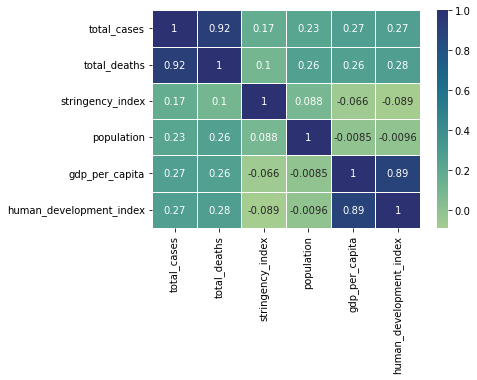

In [242]:
sns.heatmap(df1.corr(), 
            cmap='crest',
            annot=True,
            linewidth=0.5)

# Method
using Linear Regression, StandardScaler, Pipeline with split functions & k-fold method.
The k-fold cross validation method is used to evaluate how effectively the method performed on data.

In [243]:
#X = scale_trans.iloc[:, :-2].values
#y = df_.iloc[:, -1].values
X = scale_trans[['total_cases', 'total_deaths', 'stringency_index','population', 'human_development_index']]
y = scale_trans['gdp_per_capita']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=42)

In [244]:
k_fold = KFold(shuffle=True, random_state=31518, n_splits=4)

# Variance & pipeline
Determines the percentage of the dependent variable's variance that the independent variable.
The variance scores of the variables exhibit fairly similar results to each other when using the Standard Scaler and Linear Regression, with values of 0.806 and 0.798, respectively.

In [245]:
# Scale with K-fold 
scale = StandardScaler()

X_train_ = scale.fit_transform(X_train)
X_test = scale.transform(X_test)  
scale_score = r2_score(y_test.values, y_predict)
scale_score 

0.806736961880535

In [246]:
# regression with K-fold 
lir = LinearRegression()

lir.fit(X_train_, y_train)
y_predict = lr.predict(X_test)

pipe = Pipeline([("scaler", scale),("regression", lir)])
predict_lir = cross_val_predict(pipe, X_train, y_train)
lir_score = r2_score(y_train, predict_lir)
lir_score

0.798358481673621

# Lasso
The lasso regression plot indicated a negative correlation between the variables' parameter values. This once again demonstrates that when alpha increases, model complexity decreases.

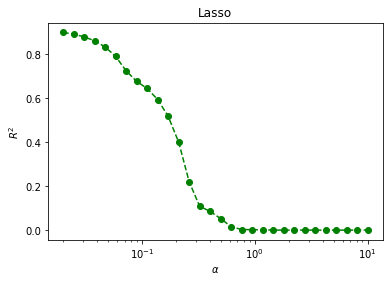

In [247]:
#lasso gives proper 
Poly = PolynomialFeatures(degree=5)
scores = []
alphas = np.geomspace(0.02, 10.0, 30)
predict_lasso = []
for alpha in alphas:
    las_alpha = Lasso(alpha=alpha, max_iter=10000)
    
    Pipe = Pipeline([("scaler", scale), ("feature", Poly), ("lasso", las_alpha)])

    predict_lasso = cross_val_predict(Pipe, X_train, y_train)
    
    r_2_s = r2_score(y_train, predict_lasso)
    
    scores.append(r_2_s)
plt.semilogx(alphas, scores, '--o', color='green')
plt.title('Lasso')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [252]:
r_2_s

-3.99499162431205e-05

# Conclusion
Due to pandamic, the provided data cannot accurately reflect the global market's true impact. Due to a lack of equipment in some developing countries, there aren't enough cases to report. On the other hand, developed nations have sufficient testing facilities and offer more cases for both testing and showing.
Perhaps gathering more frequent data on specific countries might help to produce more precise results when predicting the impact on GDP for a particular country.